In [144]:
# YouTube Stats Analytics 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import plotly.express as px

In [50]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding = 'latin1')

## Data Cleaning and preparation

In [51]:
df


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,...,2000000,2006,Mar,13,28,1366417754,5,471031528,21,79
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006,Mar,5,88,328239523,15,270663028,37,-96
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000,2012,Feb,20,88,328239523,15,270663028,37,-96
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000,2006,Sep,1,88,328239523,15,270663028,37,-96
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,...,1000000,2006,Sep,20,28,1366417754,5,471031528,21,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9029609749,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000,2017,Feb,12,51,212559417,12,183241641,-14,-52
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000,2018,Sep,14,28,1366417754,5,471031528,21,79
992,993,Panda,12300000,2214684303,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000,2006,Sep,11,60,66834405,4,55908316,55,-3
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000,2012,May,9,67,10285453,6,9021165,60,19


In [52]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995,995,995,995,994,879,962,939,995,995,...,995,658,990,990,872,872,872,872,872,872
mean,498,22982412,11039537052,9187,554249,386,746,175610285,36886,589808,...,7081814,349079,2013,16,64,430387267,9,224214982,27,-14
std,287,17526105,14110844377,34151,1362782,1232,1944,416378166,71859,1148622,...,13797038,614355,5,9,26,472794722,5,154687363,21,85
min,1,12300000,0,0,1,1,1,1,0,0,...,0,1,1970,1,8,202506,1,35588,-38,-172
25%,250,14500000,4288145410,194,323,11,27,20137500,2700,43500,...,521750,100000,2009,8,36,83355411,5,55908316,21,-96
50%,498,17700000,7760819588,729,916,51,66,64085000,13300,212700,...,2600000,200000,2013,16,68,328239523,9,270663028,37,-52
75%,746,24600000,13554701853,2668,3584,123,140,168826500,37900,606800,...,7300000,400000,2016,23,88,328239523,15,270663028,37,79
max,995,245000000,228000000000,301308,4057944,7741,7741,6589000000,850900,13600000,...,163400000,8000000,2022,31,113,1397715000,15,842933962,62,138


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

### Check for NaN Values

In [54]:
df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

There are a lot of missing values that we will not drop due to the high number of NaN values. This can affect our data proccessing and visualization. 

### Check for Duplicates

In [55]:
df.duplicated().sum()

0

### Change Long Scientific Numbers Into Digits Only 

In [56]:
pd.set_option('display.float_format','{:.2f}'.format)

In [57]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

## Data Cleaning 

There seem to be a video that was created in 1970. this is clearly an outlier and we will drop this data from our database. 

In [58]:
df = df.drop(df[df['created_year'] < 2000].index)

## Data Visualization (Groupbys)

### Average Subscribers by Video Category

In [59]:
category_subscriber_means = df.groupby('category')['subscribers'].mean().sort_values(ascending = False)
category_subscriber_means

category
Shows                   41615384.62
Trailers                39000000.00
Film & Animation        28584782.61
Nonprofits & Activism   27750000.00
Sports                  27109090.91
Education               26542222.22
Music                   25717821.78
Movies                  25650000.00
Entertainment           21403319.50
People & Blogs          21056060.61
Gaming                  20852127.66
Comedy                  20123188.41
News & Politics         20004000.00
Howto & Style           19390000.00
Science & Technology    18617647.06
Pets & Animals          18100000.00
Autos & Vehicles        17850000.00
Travel & Events         12500000.00
Name: subscribers, dtype: float64

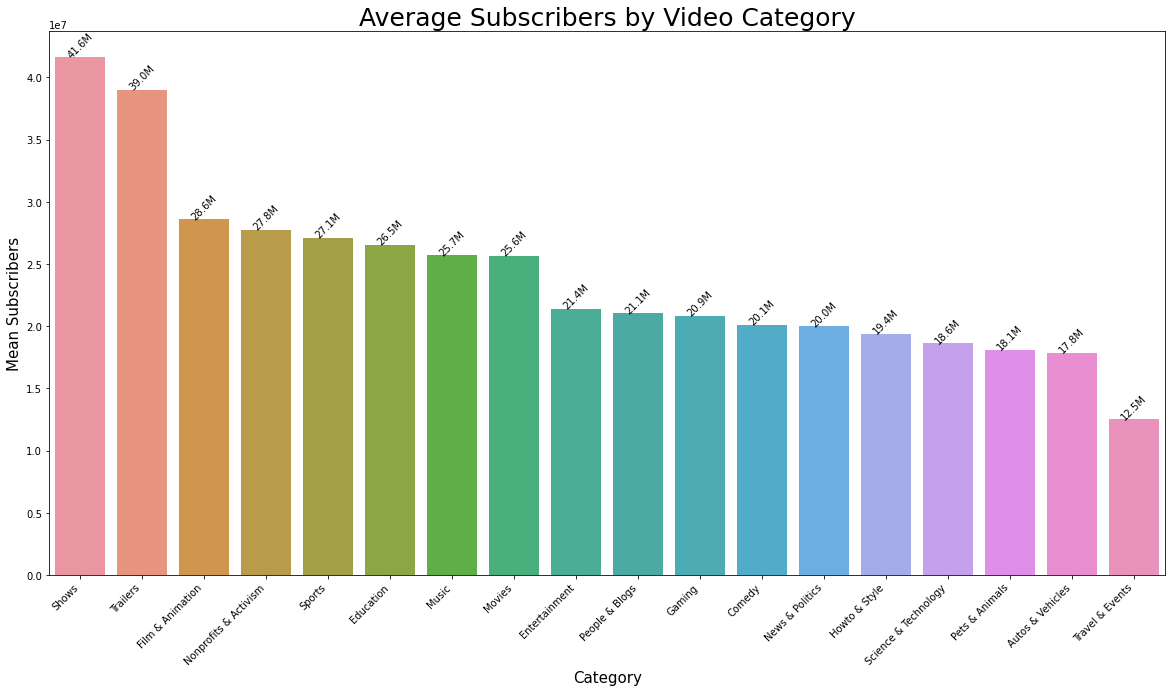

In [111]:
plt.figure(figsize = (20, 10))
p = sns.barplot( x= category_subscriber_means.index, y= category_subscriber_means.sort_values(ascending = False))

for b in p.patches:
    p.annotate(str(round(b.get_height() / 1e6, 1)) + 'M',
    (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6),
    ha='center', va='top', rotation='45',
    xytext=(0, 12),  # Adjusted to move the labels above the bars
    textcoords='offset points')


plt.xlabel('Category' , fontsize = 15)

plt.xticks(rotation=45, horizontalalignment='right')


plt.ylabel('Mean Subscribers', fontsize = 15)



plt.title('Average Subscribers by Video Category', fontsize = 25)

plt.show()

### Counts of Channel Types

In [61]:
channel_type_counts = df['channel_type'].value_counts()
channel_type_counts

Entertainment    303
Music            216
People           101
Games             98
Comedy            51
Education         49
Film              42
Howto             36
News              30
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: channel_type, dtype: int64

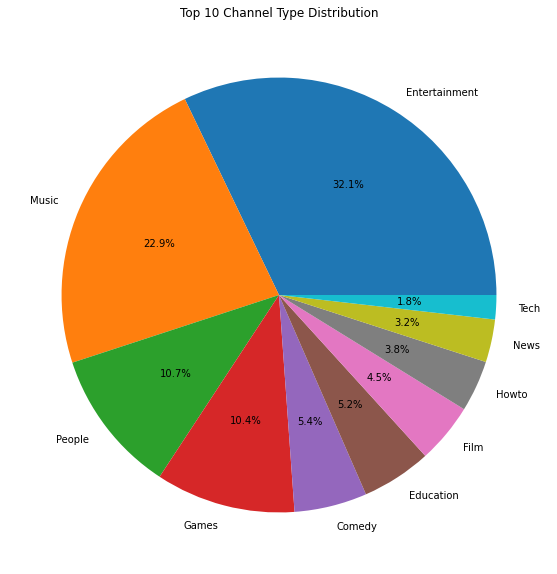

In [62]:
plt.figure(figsize = (20, 10))


ax = channel_type_counts.head(10).plot(kind='pie', autopct='%1.1f%%')


plt.title('Top 10 Channel Type Distribution')
plt.ylabel('')

plt.show()

### Scatter Plot Between Subscribers and Views

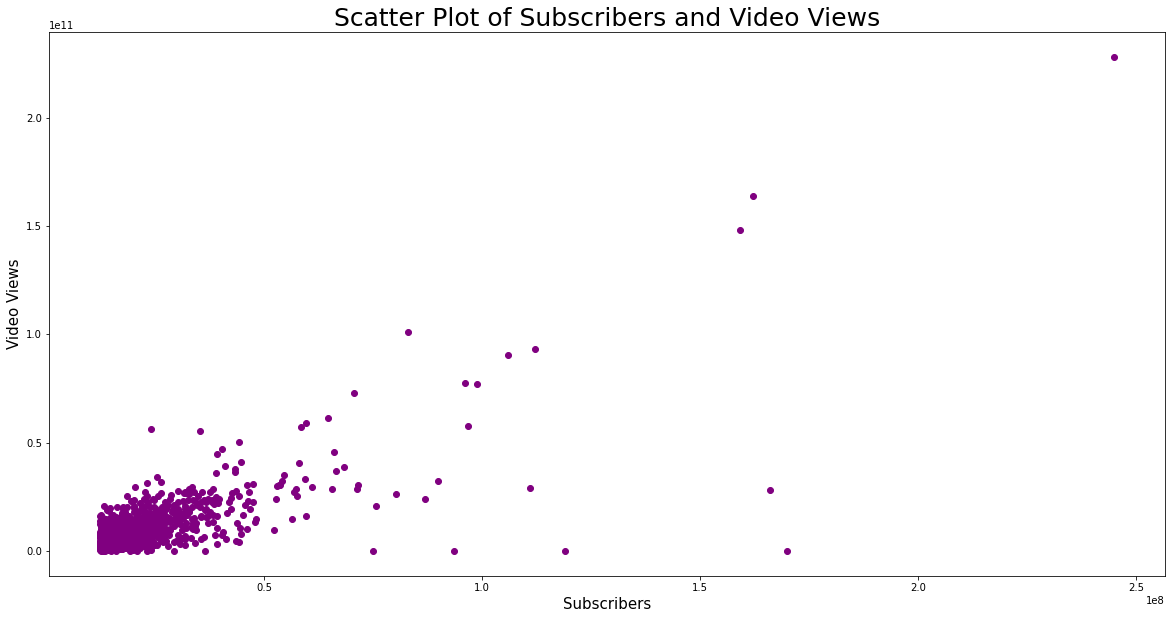

In [63]:
plt.figure(figsize = (20, 10))

plt.scatter(df['subscribers'],df['video views'], color='purple')
plt.title('Scatter Plot of Subscribers and Video Views', fontsize = 25)
plt.xlabel('Subscribers', fontsize = 15)
plt.ylabel('Video Views', fontsize = 15)
plt.show()

### Total Subscribers by Country

In [64]:
subscribers_sum_by_country = df.groupby('Country')['subscribers'].sum().sort_values(ascending = False)
subscribers_sum_by_country

Country
United States           7293200000
India                   4310600000
Brazil                  1221800000
United Kingdom           917400000
Mexico                   626900000
Indonesia                534100000
South Korea              481700000
Russia                   407200000
Thailand                 386500000
Spain                    385100000
Canada                   363900000
Argentina                328500000
Colombia                 264500000
Philippines              240100000
Japan                    189100000
Saudi Arabia             179100000
Australia                172000000
Pakistan                 155400000
United Arab Emirates     148200000
Ukraine                  125600000
Germany                  116400000
Turkey                    91600000
Chile                     87200000
France                    83900000
Jordan                    67000000
Sweden                    63000000
Singapore                 59700000
Netherlands               58100000
Vietnam     

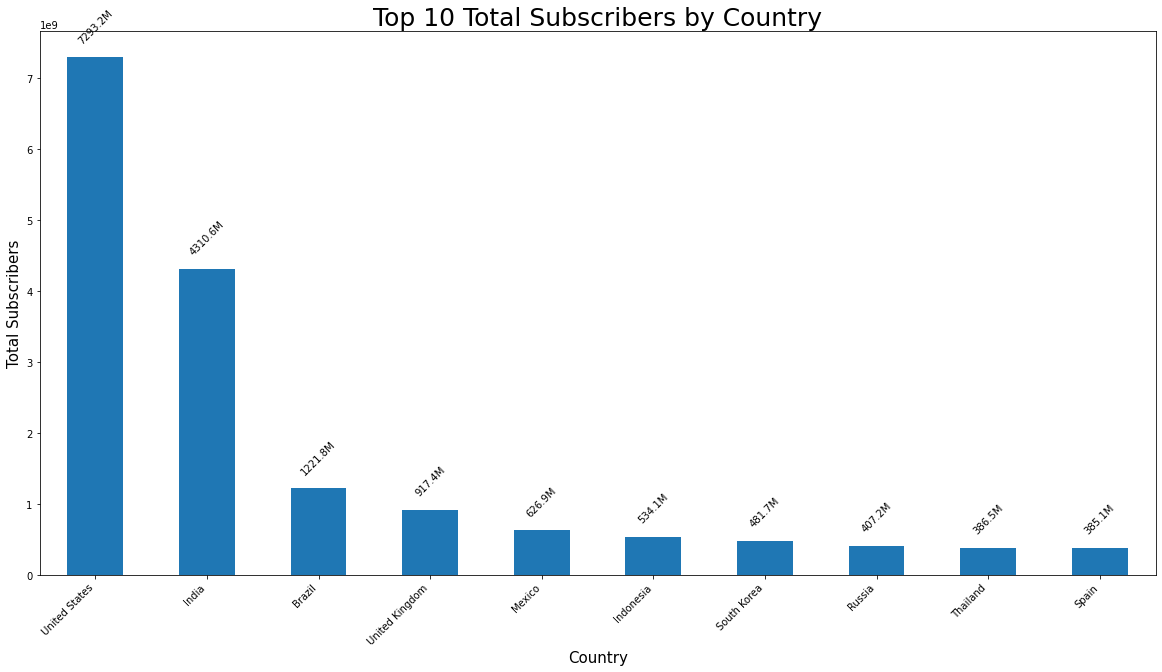

In [68]:
plt.figure(figsize = (20, 10))
p = subscribers_sum_by_country.head(10).plot(kind = 'bar') 


plt.xlabel('Country', fontsize = 15)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Total Subscribers', fontsize = 15)
plt.title('Top 10 Total Subscribers by Country', fontsize = 25)


for b in p.patches:
    p.annotate(str(round(b.get_height() / 1e6, 1)) + 'M',
    (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6),
    ha='center', va='bottom', rotation='45',
    xytext=(0, 12),  # Adjusted to move the labels above the bars
    textcoords='offset points')


    
plt.show()

In [69]:
### Change 2 Decimal Digits to 0 

In [70]:
pd.set_option('display.float_format','{:.0f}'.format)

###  The Year Created  by Average Subscribers

In [71]:
Year_average_subscribers = df.groupby('created_year')['subscribers'].mean().sort_values(ascending = False)
Year_average_subscribers

created_year
2006   31884615
2005   25829167
2007   24902041
2013   24527632
2012   24038235
2008   23652174
2009   23105769
2016   23101299
2018   23060870
2011   21800000
2020   21350000
2015   21247945
2010   20670833
2014   20618367
2017   18666176
2019   18639394
2021   18573913
2022   13640000
Name: subscribers, dtype: float64

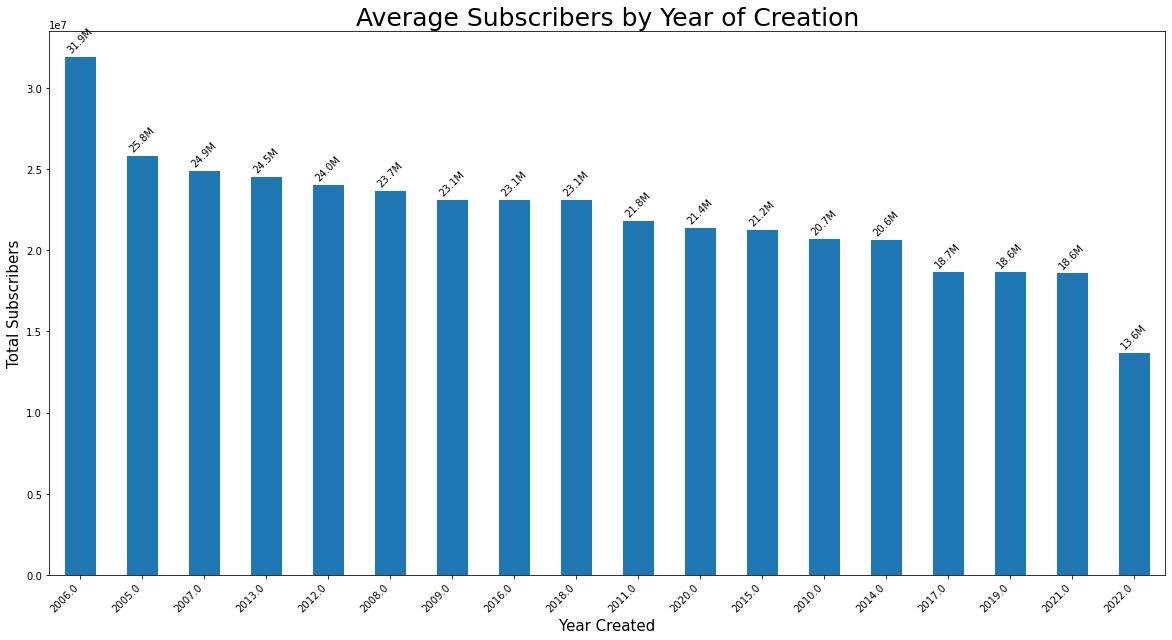

In [72]:
plt.figure(figsize = (20, 10))
p = Year_average_subscribers.plot(kind = 'bar') 


plt.xlabel('Year Created', fontsize = 15)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Total Subscribers', fontsize = 15)
plt.title('Average Subscribers by Year of Creation', fontsize = 25)


for b in p.patches:
    p.annotate(str(round(b.get_height() / 1e6, 1)) + 'M',
    (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6),
    ha='center', va='top', rotation='45',
    xytext=(0, 12),  # Adjusted to move the labels above the bars
    textcoords='offset points')


    
plt.show()

### Average Video View Ranks by Channel Type

In [73]:
video_views_rank_by_channel_type_mean = df.groupby('channel_type')['video_views_rank'].mean().sort_values(ascending = False)
video_views_rank_by_channel_type_mean

channel_type
Autos           2508626
People          1209192
Games            871194
Sports           608567
Film             491197
Comedy           376547
Music            365329
News             337491
Tech             242110
Entertainment    238259
Education         91037
Howto              3280
Nonprofit          1538
Animals             550
Name: video_views_rank, dtype: float64

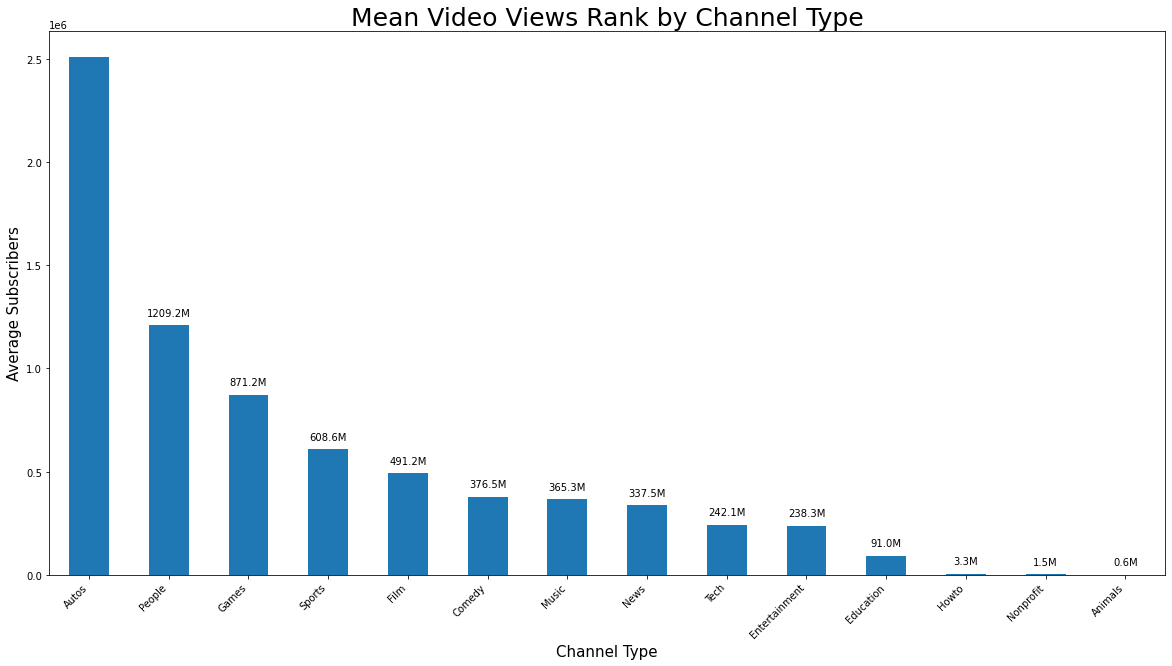

In [74]:
plt.figure(figsize = (20, 10))
p = video_views_rank_by_channel_type_mean.plot(kind = 'bar') 


plt.xlabel('Channel Type', fontsize = 15)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Average Subscribers', fontsize = 15)
plt.title('Mean Video Views Rank by Channel Type', fontsize = 25)


for b in p.patches:
    p.annotate(str(round(b.get_height() / 1e3, 1)) + 'M',
    (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6),
    ha='center', va='top', rotation='0',
    xytext=(0, -230),  # Adjusted to move the labels above the bars
    textcoords='offset points')


    
plt.show()

### Maximum Subcribers by Country For The Past 30 Days (World Map)

In [75]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [76]:
max_subscribers_by_country_past_30_days = df.groupby(['Latitude','Longitude','Country', 'channel_type'])['subscribers_for_last_30_days'].max()
max_subscribers_by_country_past_30_days.dropna()

df1 = pd.DataFrame(max_subscribers_by_country_past_30_days)

# Create a DataFrame from the maximum subscribers data
df1 = pd.DataFrame(max_subscribers_by_country_past_30_days).reset_index()

# Display the table
df1.dropna()
df1

,Latitude,Longitude,Country,channel_type,subscribers_for_last_30_days
0,-38,-64,Argentina,Comedy,700000
1,-38,-64,Argentina,Education,100000
2,-38,-64,Argentina,Entertainment,600000
3,-38,-64,Argentina,Games,1900000
4,-38,-64,Argentina,Music,600000
...,...,...,...,...,...
165,62,105,Russia,Film,700000
166,62,105,Russia,Games,200000
167,62,105,Russia,News,NaN
168,62,105,Russia,People,1600000


In [77]:
# Create the scatter_geo plot
map_fig = px.scatter_geo(df1,
                         lat = 'Latitude',
                         lon= 'Longitude',
                         projection='orthographic',
                         color='channel_type',
                         opacity=0.8,
                         hover_name='Country',
                         hover_data=['subscribers_for_last_30_days'])

map_fig.show()

###  Total Subscribers per Month

In [78]:
# Define the custom order of months
custom_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


month_created_by_sum_subscribers = df.groupby('created_month')['subscribers'].sum().reindex(custom_order)


month_created_by_sum_subscribers

created_month
Jan    2218300000
Feb    1533800000
Mar    2320500000
Apr    1581200000
May    1997700000
Jun    1846400000
Jul    1922300000
Aug    1813600000
Sep    2496200000
Oct    1503700000
Nov    1930200000
Dec    1577300000
Name: subscribers, dtype: int64

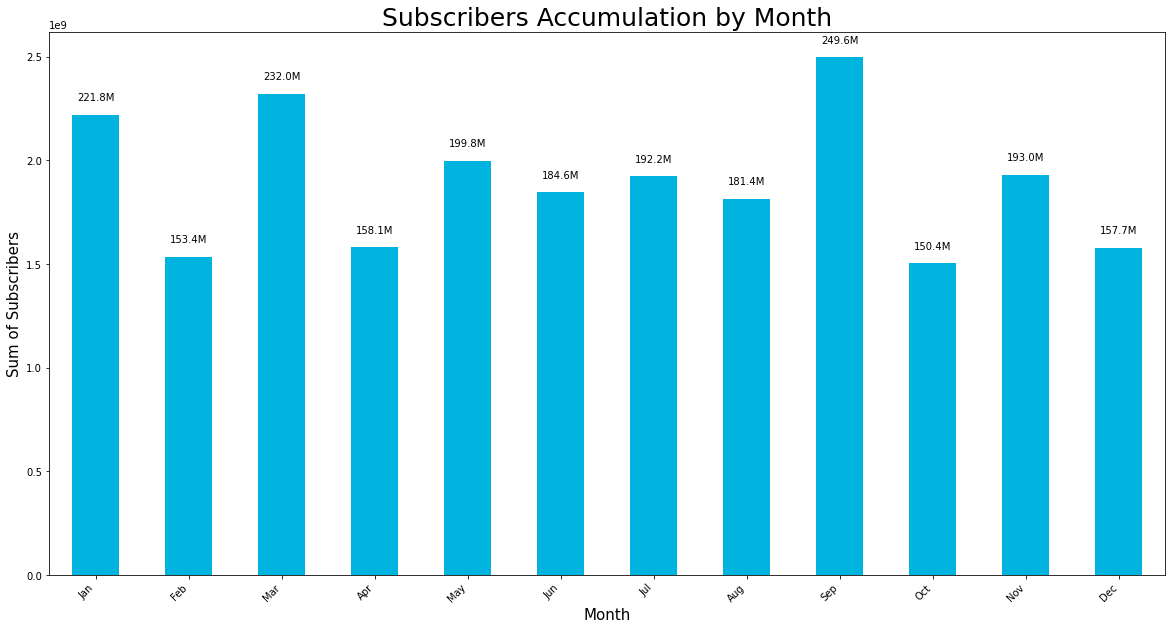

In [109]:
plt.figure(figsize = (20, 10))
p = month_created_by_sum_subscribers.plot(kind = 'bar', color = '#00B4DF') 


plt.xlabel('Month', fontsize = 15)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Sum of Subscribers', fontsize = 15)
plt.title('Subscribers Accumulation by Month', fontsize = 25)


for b in p.patches:
    p.annotate(str(round(b.get_height() / 1e7, 1)) + 'M',
    (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6),
    ha='center', va='bottom', rotation='0',
    xytext=(0, 12),  # Adjusted to move the labels above the bars
    textcoords='offset points')


    
plt.show()

### Standard Deviation of Video Views per Category

In [80]:
category_video_views_std = df.groupby('category')['video views'].std().sort_values(ascending =True)
category_video_views_std

category
Trailers                 1382496086
Nonprofits & Activism    2698145850
Science & Technology     2937981619
Autos & Vehicles         2964425984
Movies                   3353301875
Howto & Style            4300326961
News & Politics          5043144239
Gaming                   5835933598
Comedy                   6406251669
Pets & Animals           6475165093
Entertainment           10128204611
Film & Animation        10899550881
People & Blogs          12510420847
Music                   17782784424
Sports                  21703831459
Education               25572139026
Shows                   43723894662
Travel & Events                 NaN
Name: video views, dtype: float64

In [81]:
category_video_views_mean = df.groupby('category')['video views'].mean().sort_values(ascending =True)
category_video_views_mean

category
Travel & Events          3140883140
Science & Technology     3939808654
Howto & Style            5045438638
Nonprofits & Activism    5431455892
Autos & Vehicles         7501729070
Gaming                   7634456379
Movies                   7691627564
Comedy                   7972648903
People & Blogs           9589327284
Entertainment           10488544853
News & Politics         10695245376
Pets & Animals          11216686475
Film & Animation        11835271942
Sports                  13453299147
Music                   15452858944
Education               15480321620
Trailers                16631358804
Shows                   34323602070
Name: video views, dtype: float64

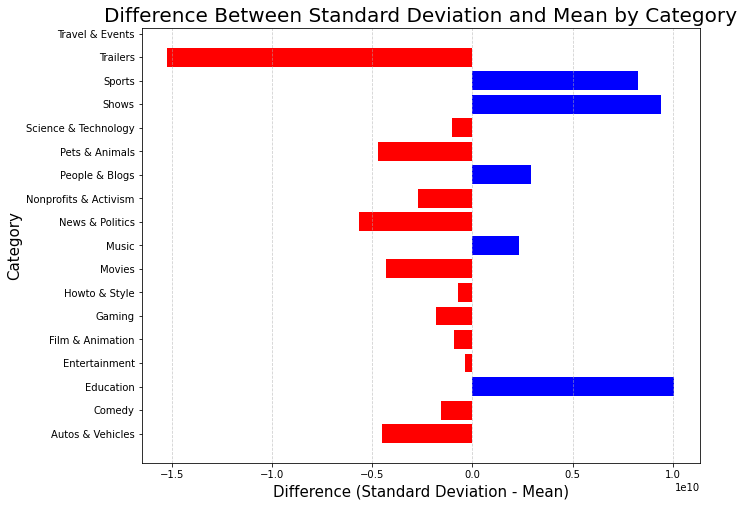

In [82]:
# Calculate the difference between standard deviation and mean
difference = category_video_views_std - category_video_views_mean

plt.figure(figsize=(10, 8))

# Create a list of colors based on the sign of differences
colors = ['red' if diff < 0 else 'blue' for diff in difference]

bars = plt.barh(difference.index, difference.values, color=colors)

plt.xlabel('Difference (Standard Deviation - Mean)', fontsize = 15)
plt.ylabel('Category', fontsize = 15)
plt.title('Difference Between Standard Deviation and Mean by Category',fontsize = 20)

plt.grid(axis='x', linestyle='--', alpha=0.6)


plt.show()

### Total Uploads by Channel Type

In [83]:
channel_type_upload_totals = df.groupby('channel_type')['uploads'].sum().sort_values(ascending = False)
channel_type_upload_totals

channel_type
News             3989151
Entertainment    3344291
Music             424950
Games             399473
Nonprofit         205824
Sports            158995
Education         146355
People            117424
Film              114654
Comedy             81722
Howto              79417
Animals            42868
Tech               33780
Autos                949
Name: uploads, dtype: int64

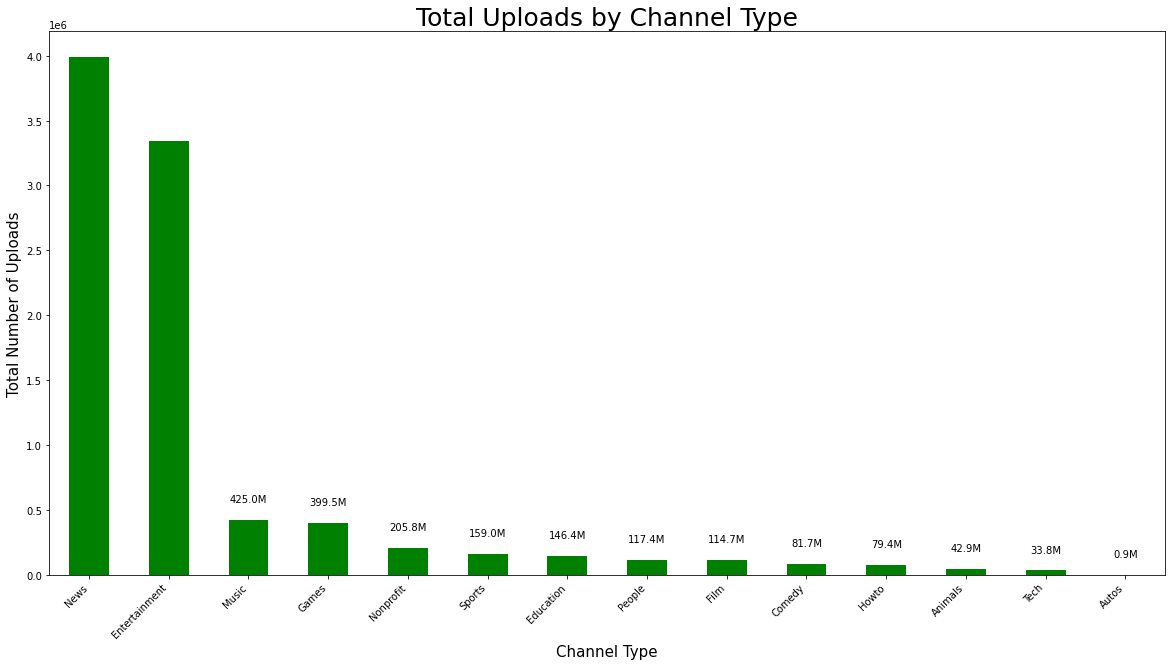

In [98]:
plt.figure(figsize = (20, 10))
p = channel_type_upload_totals.plot(kind = 'bar', color = 'g') 


plt.xlabel('Channel Type', fontsize = 15)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Total Number of Uploads', fontsize = 15)
plt.title('Total Uploads by Channel Type', fontsize = 25)


for b in p.patches:
    p.annotate(str(round(b.get_height() / 1e3, 1)) + 'M',
    (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6),
    ha='center', va='top', rotation='0',
    xytext=(0, -130),  # Adjusted to move the labels above the bars
    textcoords='offset points')


    
plt.show()

### Mean Subscribers by Created Year and Channel Type

In [132]:
yearly_channel_type_subscriber_averages= df.groupby(['created_year','channel_type'])['subscribers'].mean().unstack()
yearly_channel_type_subscriber_averages

channel_type,Animals,Autos,Comedy,Education,Entertainment,Film,Games,Howto,Music,News,Nonprofit,People,Sports,Tech
created_year,,,,,,,,,,,,,,
2005,NaN,NaN,22650000,NaN,29300000,28100000,14600000,43500000,23644444,15200000,NaN,NaN,33400000,17300000
2006,NaN,35400000,25260000,72000000,29510714,39380000,38771429,14650000,41910526,17966667,NaN,22050000,16125000,18300000
2007,NaN,14100000,14460000,NaN,23646667,NaN,18175000,NaN,29470588,18200000,NaN,NaN,96000000,NaN
2008,NaN,NaN,15000000,33400000,25133333,15000000,20475000,NaN,26226316,15050000,NaN,17366667,NaN,16400000
2009,NaN,NaN,22600000,17900000,21600000,NaN,18200000,19250000,22648000,27600000,38600000,24300000,38750000,NaN
2010,NaN,NaN,21800000,14300000,22664286,15500000,25500000,13950000,21247368,16200000,NaN,12600000,12900000,19300000
2011,NaN,NaN,25300000,30185714,19543478,20200000,24100000,21000000,22300000,NaN,NaN,16650000,13850000,18275000
2012,NaN,14900000,NaN,13550000,27168182,23700000,20166667,13500000,27270588,37000000,NaN,16533333,NaN,31700000
2013,NaN,NaN,30433333,34000000,20686364,23850000,24018750,NaN,30050000,17133333,NaN,15400000,NaN,NaN


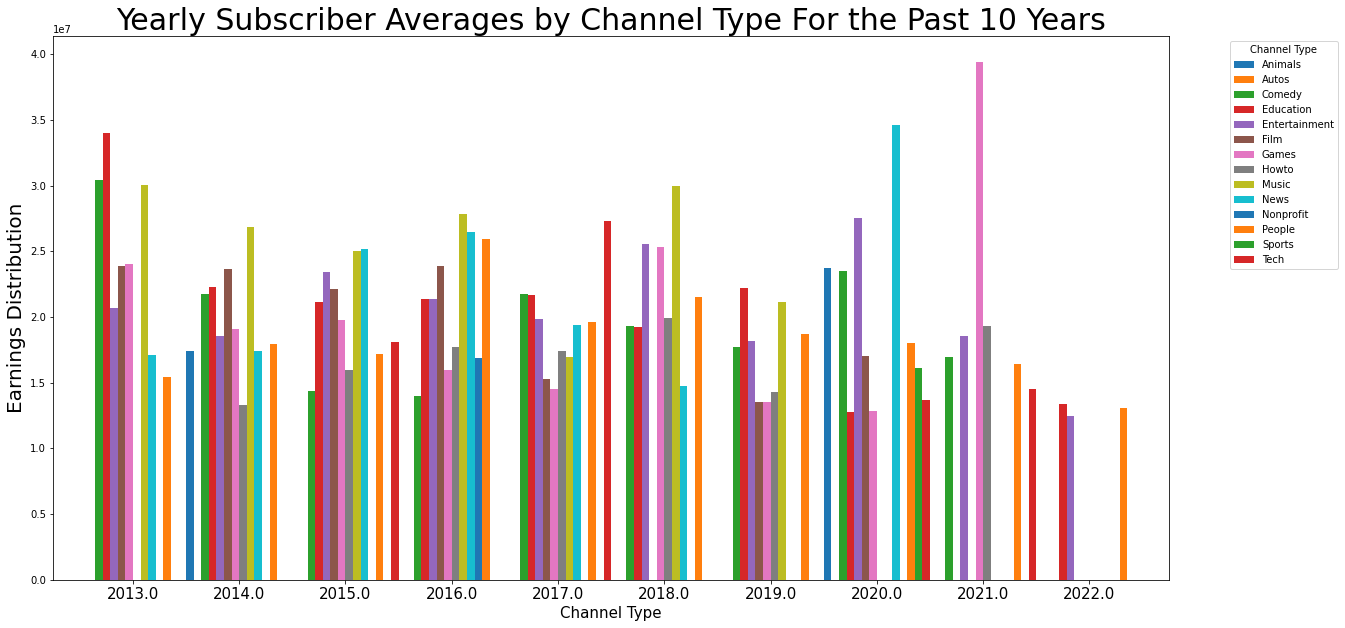

In [140]:


p = yearly_channel_type_subscriber_averages.tail(10).plot(kind = 'bar', stacked = False , width = 1, figsize=(20, 10))


plt.xlabel('Channel Type', fontsize = 15)
plt.xticks(rotation = 90)
plt.xticks(rotation=0, horizontalalignment='center', fontsize = 15)
plt. title( "Yearly Subscriber Averages by Channel Type For the Past 10 Years",fontsize = 30)
plt.ylabel('Earnings Distribution', fontsize = 20)

plt.legend(title = 'Channel Type', bbox_to_anchor = (1.05,1), loc = 'upper left')


plt.show()

## Data Visualizations

### Boxplot of Monthly Earnings by Channel Type

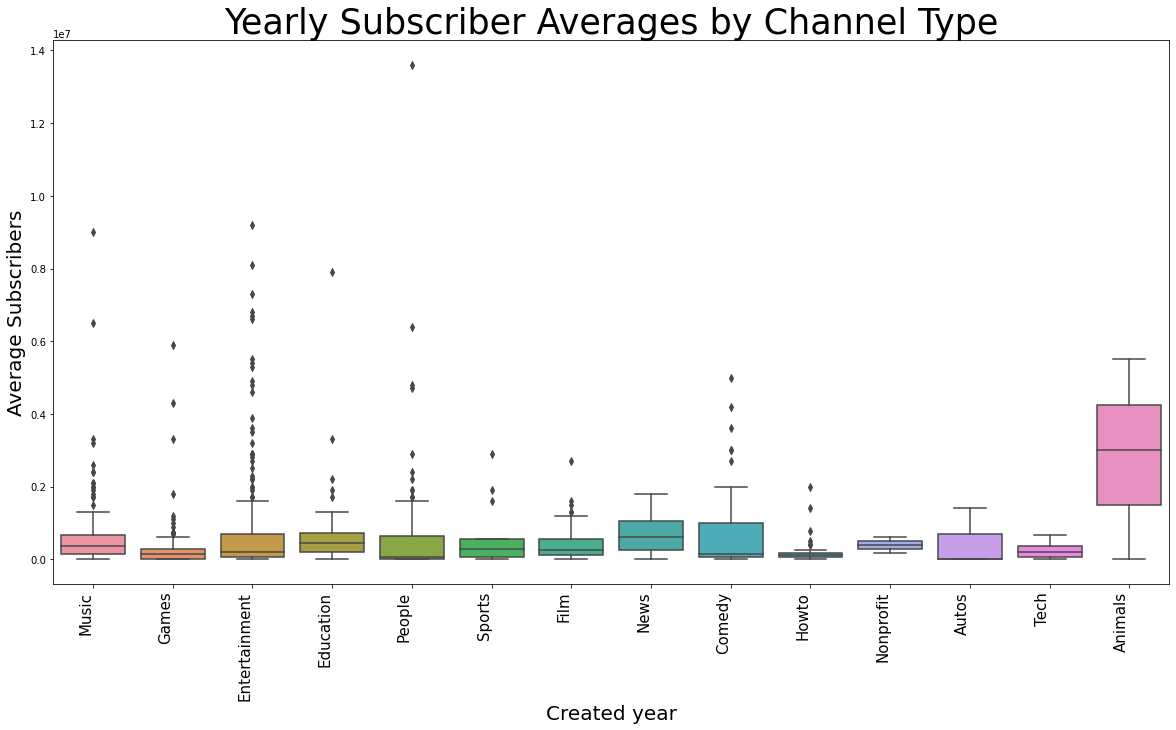

In [90]:
plt.figure(figsize = (20, 10))

sns.boxplot( x = 'channel_type', y='highest_monthly_earnings', data = df)
plt. title( "Yearly Subscriber Averages by Channel Type",fontsize = 35)
plt.xlabel('Created year', fontsize = 20)
plt.xticks(rotation=45, horizontalalignment='right', fontsize = 15)
plt.ylabel('Average Subscribers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [91]:
monthly_earnings_by_category_sum = df.groupby('category')['highest_monthly_earnings'].sum().sort_values(ascending = False)
monthly_earnings_by_category_sum

category
Entertainment           150056865
Music                   111564524
People & Blogs           72183154
Comedy                   46113543
Film & Animation         33704283
Education                31283000
Shows                    26489600
Gaming                   25559111
News & Politics          16624031
Sports                    8876300
Howto & Style             7711962
Science & Technology      3434735
Pets & Animals            3177729
Autos & Vehicles          2172700
Movies                     909400
Nonprofits & Activism      780800
Trailers                   723800
Travel & Events            124000
Name: highest_monthly_earnings, dtype: float64

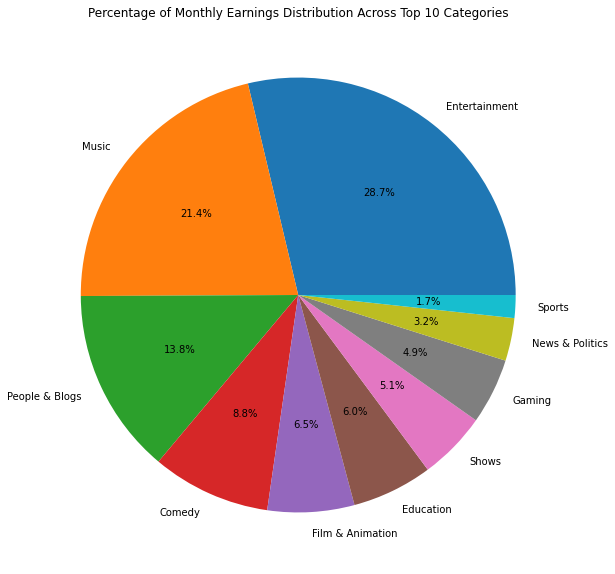

In [92]:
plt.figure(figsize = (20, 10))


ax = monthly_earnings_by_category_sum.head(10).plot(kind='pie', autopct='%1.1f%%')


plt.title('Percentage of Monthly Earnings Distribution Across Top 10 Categories')
plt.ylabel('')

plt.show()

In [93]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

### Scatter Plot of Tertiary Education Enrollment vs. Subscribers

In [94]:
tertiary_enrollment_and_subscribers= df['Gross tertiary education enrollment (%)'],df['subscribers']
tertiary_enrollment_and_subscribers

(0     28
 1     88
 2     88
 3     88
 4     28
       ..
 990   51
 991   28
 992   60
 993   67
 994   28
 Name: Gross tertiary education enrollment (%), Length: 994, dtype: float64,
 0      245000000
 1      170000000
 2      166000000
 3      162000000
 4      159000000
          ...    
 990     12300000
 991     12300000
 992     12300000
 993     12300000
 994     12300000
 Name: subscribers, Length: 994, dtype: int64)

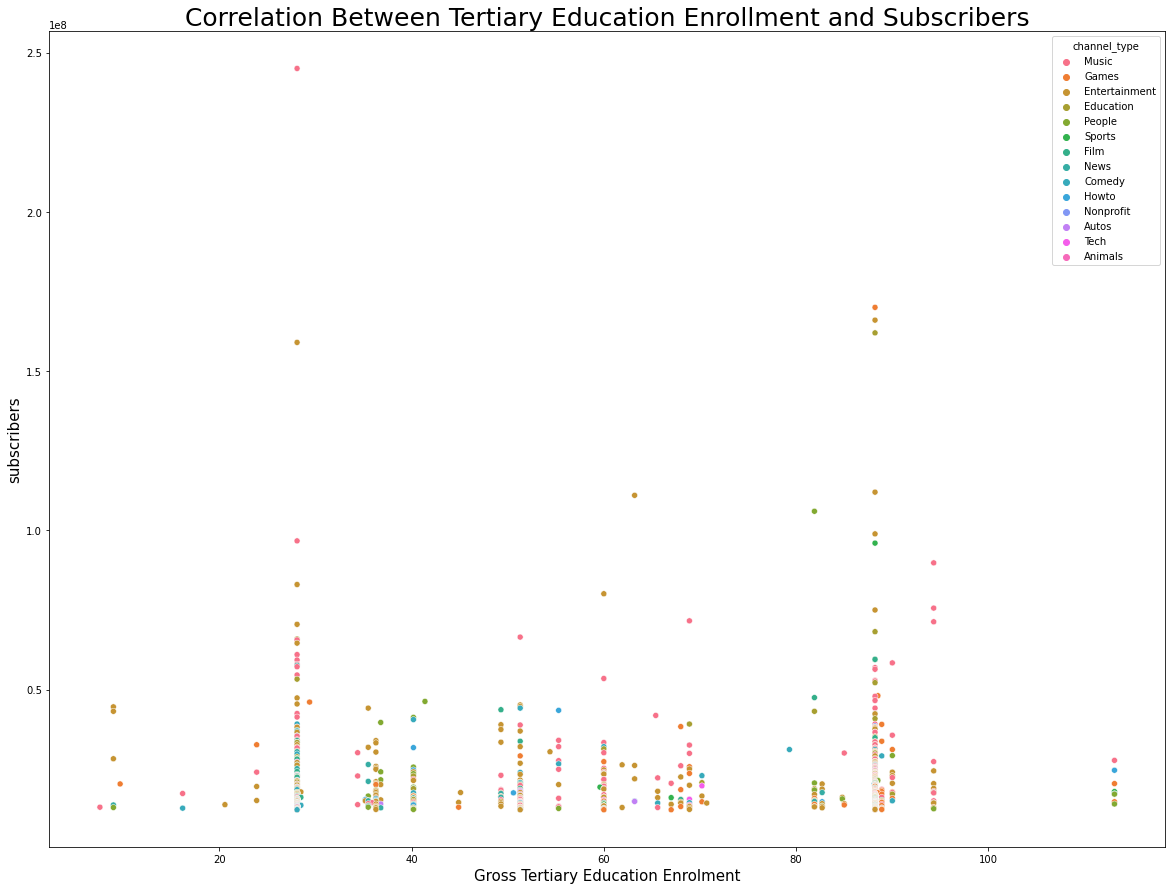

In [143]:
plt.figure(figsize = (20, 15))

sns.scatterplot( x = 'Gross tertiary education enrollment (%)', y = 'subscribers', data =df, hue = 'channel_type')

plt.title('Correlation Between Tertiary Education Enrollment and Subscribers', fontsize = 25)
plt.xlabel('Gross Tertiary Education Enrolment', fontsize = 15)
plt.ylabel('subscribers', fontsize = 15)
plt.show()